# Appendix
**By Heider Jeffer**

In [6]:
# Appendix A: Python Code – Discrete Event Simulation (DES)
# By Heider Jeffer

import heapq
import random

class Event:
    def __init__(self, time, event_type):
        self.time = time
        self.event_type = event_type

    def __lt__(self, other):
        return self.time < other.time

def simulate_queue(arrival_rate=1.0, service_rate=1.2, sim_time=100):
    clock = 0
    queue = []
    event_queue = []
    busy = False
    wait_times = []

    def schedule_event(time, event_type):
        heapq.heappush(event_queue, Event(time, event_type))

    # Initial arrival
    schedule_event(random.expovariate(arrival_rate), 'arrival')

    while event_queue and clock < sim_time:
        event = heapq.heappop(event_queue)
        clock = event.time

        if event.event_type == 'arrival':
            if not busy:
                busy = True
                service_time = random.expovariate(service_rate)
                schedule_event(clock + service_time, 'departure')
            else:
                queue.append(clock)
            schedule_event(clock + random.expovariate(arrival_rate), 'arrival')

        elif event.event_type == 'departure':
            if queue:
                arrival_time = queue.pop(0)
                wait_times.append(clock - arrival_time)
                service_time = random.expovariate(service_rate)
                schedule_event(clock + service_time, 'departure')
            else:
                busy = False

    return sum(wait_times)/len(wait_times) if wait_times else 0.0

avg_wait = simulate_queue()
print("Average Wait Time:", avg_wait)


Average Wait Time: 1.9962285426867634


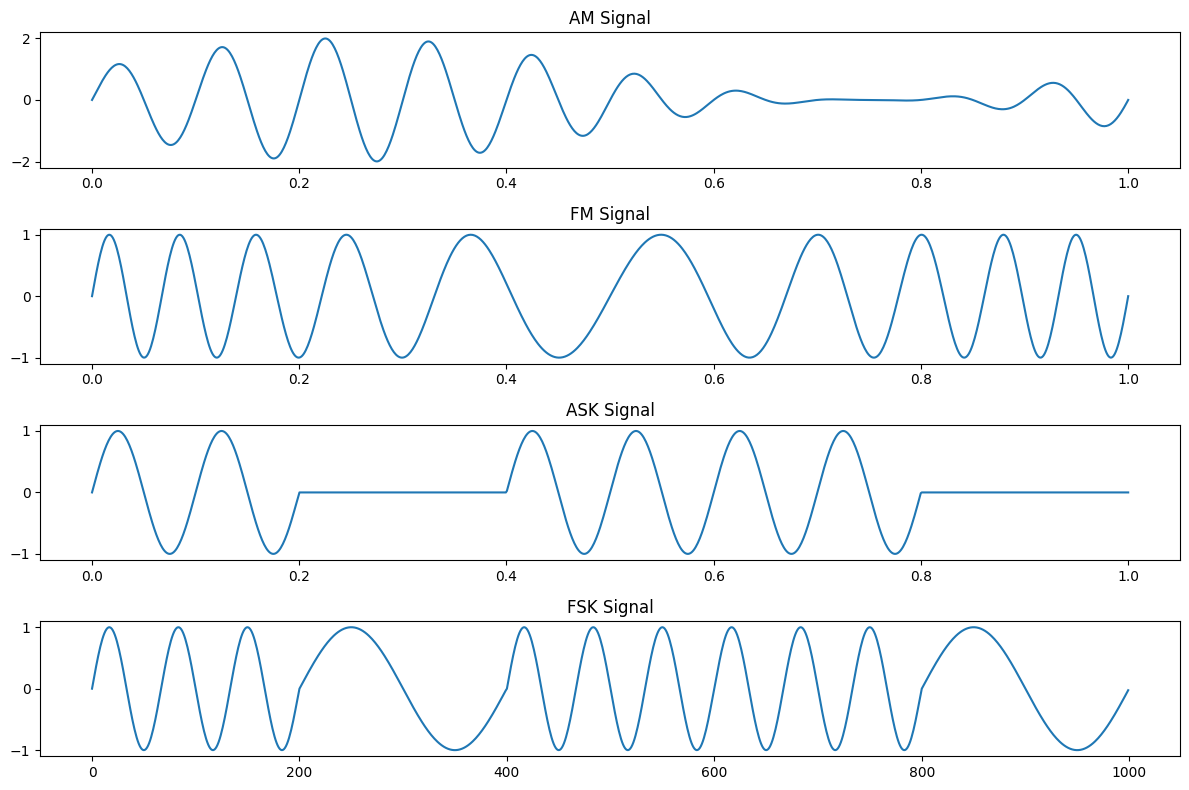

In [7]:
# Appendix B: Python Code – Modulation (AM, FM, ASK, FSK)
# By Heider Jeffer
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 1000)
carrier_freq = 10
message_freq = 1
carrier = np.sin(2 * np.pi * carrier_freq * t)
message = np.sin(2 * np.pi * message_freq * t)

# AM
am = (1 + message) * carrier

# FM
k = 5  # frequency deviation
fm = np.sin(2 * np.pi * carrier_freq * t + k * np.sin(2 * np.pi * message_freq * t))

# ASK
bitstream = np.array([1, 0, 1, 1, 0])
ask = np.repeat(bitstream, 200) * np.sin(2 * np.pi * carrier_freq * t[:1000])

# FSK
f1, f2 = 5, 15
fsk = np.concatenate([
    np.sin(2 * np.pi * f1 * t[:200]) if bit == 0 else np.sin(2 * np.pi * f2 * t[:200])
    for bit in bitstream
])

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1); plt.plot(t, am); plt.title("AM Signal")
plt.subplot(4, 1, 2); plt.plot(t, fm); plt.title("FM Signal")
plt.subplot(4, 1, 3); plt.plot(t, ask); plt.title("ASK Signal")
plt.subplot(4, 1, 4); plt.plot(fsk); plt.title("FSK Signal")
plt.tight_layout()
plt.show()




In [ ]:
# Appendix C: Python Code – Optimization (Gradient Descent and Genetic Algorithm)

In [8]:
# Gradient Descent
def f(x): return x**2 + 4*x + 4
def df(x): return 2*x + 4

x = 10
learning_rate = 0.1
for _ in range(100):
    x = x - learning_rate * df(x)
print("Minimum at x =", x)


Minimum at x = -1.9999999975555567


In [15]:
# Genetic Algorithm (with deap library)
from deap import base, creator, tools, algorithms
import random

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -5, 5)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def rastrigin(ind):
    return 10 * len(ind) + sum(x**2 - 10 * np.cos(2 * np.pi * x) for x in ind),

toolbox.register("evaluate", rastrigin)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=50)
algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, verbose=False)
best = tools.selBest(pop, 1)[0]
print("Best individual:", best)


Best individual: [-0.009048470318822721, 1.2687742205831336e-05]
